# Insertion Sort

## Concept
Given the array `[2,3,4,1,6]`, our goal is to sort the array so that it looks like `[1,2,3,4,6]`. We do this by first sorting the initial subarray of length 1 (trivial), then sort the next subarray inclusive of length 2, then subarray of length 3 etc.

We do this by using 2 pointers `i` and `j`:
```python
def insertionSort(arr):
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
        j = i - 1
        while j >= 0 and arr[j + 1] < arr[j]:
            # arr[j] and arr[j + 1] are out of order so swap them 
            tmp = arr[j + 1]
            arr[j + 1] = arr[j]
            arr[j] = tmp
            j -= 1
    return arr
```

1. `i` points at the element we are considoring to insert into the sorted subarray
2. `j` points to the element that we are comparing with `arr[i]`. This initially starts off as the elem to the left of `i`
    - Note that if `arr[i]` is bigger than the initial `arr[j]`, then no need to change position of `i` as the subarray is already sorted (ascending)
    - this means `arr[i]` is bigger than all the elems in the subarray
3. Our goal is to find the position that `i` should be inserted, in the sorted subarray
4. We do this by swapping with `arr[j]` until we find the correct position
    - if `arr[j]` is *larger than* this [i], then swap positions and move `j` left by one
    - we keep comparing until we hit the first `arr[j]` that is smaller than this [i]

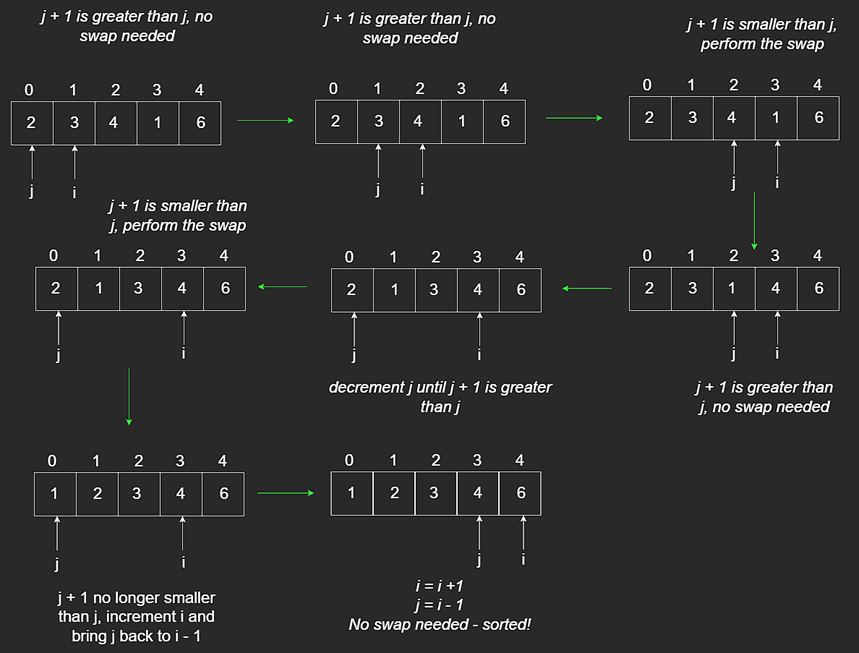

> The terms above such as subarray and subproblem may remind you of the concept of recursion, which we just learned. Insertion sort happens to be easier to implement iteratively.


## Stability

Stability in a sorting algorithm refers to the relative order of the elements after the sorting is done. Take `[7,3,7]` for example. There are two "distinct" 7s, one at the 0th index and the other at the 2nd index. We know that the relative order of these two 7s will stay the same since 3 will swap with the 7 at the 0th index and the next swap doesnt occur.

This is called a stable sorting algorithm. Insertion sort is stable, meaning that it is guaranteed that the relative order of same-value elems will remain the same. Not all sorting algorithms are stable.

---

## Time and space complexity

**Time**

If the array is already sorted, then no swapping happens and it will go through comparing pair by pair - $O(n)$. This is the best case.

In the worst case scenario, the array is in descending order, then it will do 1+2+3+4... swaps which is arithmetic series and approximately $O(n^2)$

Note that even if the array is in random order, the time complexity is still $O(n^2)$ in the average case.

**Space**

Insertion sort is an in-place sorting algorithim, so no additional data structures are used and is $O(1)$


In [16]:
from typing import List
#Definition for a pair.
class Pair:
    def __init__(self, key: int, value: str):
        self.key = key
        self.value = value
class Solution:
    def insertionSort(self, pairs: List[Pair]) -> List[List[Pair]]:
        result=[pairs[:]] if pairs else []
        for i in range(1,len(pairs)):
            j=i-1
            while j>=0 and pairs[j][0]>pairs[j+1][0]:

                #swap the 2 elems
                temp=pairs[j+1]
                pairs[j+1]=pairs[j]
                pairs[j]=temp
                j-=1
            
            #need to make copy here
            #VERY IMPORTANT, ATTEMPTING TO APPEND WHILE MODIFYING VARIABLE WILL ONLY APPEND THE LATEST
            result.append(pairs[:])
        return result

sol=Solution()
pairs = [(5, "apple"), (2, "banana"), (9, "cherry")]
print(sol.insertionSort(pairs))

[[(2, 'banana'), (5, 'apple'), (9, 'cherry')], [(2, 'banana'), (5, 'apple'), (9, 'cherry')]]


In [ ]:
#their sol
# Definition for a pair.
# class Pair:
#     def __init__(self, key: int, value: str):
#         self.key = key
#         self.value = value
class Solution:
    # Implementation of Insertion Sort
    def insertionSort(self, pairs: List[Pair]) -> List[List[Pair]]:
        n = len(pairs)
        res = []  # To store the intermediate states of the array
        
        #this starts from 0, not 1, so while loop doesnt run during the first for loop but pairs is still appended
        for i in range(n):
            j = i - 1

            # Move elements that are greater than key one position ahead
            while j >= 0 and pairs[j].key > pairs[j + 1].key:
                #swap
                pairs[j], pairs[j + 1] = pairs[j + 1], pairs[j]
                j -= 1
            
            # Clone and save the entire state of the array at this point
            res.append(pairs[:])

        return res
